In [1]:
import numpy as np
from mrashpen.inference.penalized_regression import PenalizedRegression as MrASHPen
from mrashpen.models.normal_means_ash import NormalMeansASH

import sys
sys.path.append('/home/saikat/Documents/work/sparse-regression/simulation/eb-linreg-dsc/dsc/functions')
import simulate

import matplotlib.pyplot as plt
from pymir import mpl_stylesheet
from pymir import mpl_utils
mpl_stylesheet.banskt_presentation()

In [22]:
n = 100
p = 20000
p_causal = 5
pve = 0.5
k = 5

# residual_var = 1
# X = np.random.normal(0, 1, size = n * p).reshape(n, p)
# Xnorm = X / np.sqrt(np.sum(np.square(X), axis = 0))
# b = np.zeros(p)
# bidx = np.random.choice(p, s, replace = False)
# b[bidx] = np.random.normal(0, 1, size = s)
# y = np.dot(X, b) + np.random.normal(0, residual_var, size = n)

# Xtest = np.random.normal(0, 1, size = n * p).reshape(n, p)
# Xtestnorm = Xtest / np.sqrt(np.sum(np.square(Xtest), axis = 0))
# ytest = np.dot(Xtest, b) + np.random.normal(0, residual_var, size = n)

X, y, Xtest, ytest, b, sigma = simulate.equicorr_predictors (n, p, p_causal, pve)
residual_var = sigma * sigma

## Prior
w = np.zeros(k)
w[0] = 0.0
w[1:(k-1)] = np.repeat((1 - w[0])/(k-1), (k - 2))
w[k-1] = 1 - np.sum(w)
prior_grid = np.arange(k) * 5

In [23]:
b0 = b.copy()

plr_lbfgs = MrASHPen(optimize_w = False)
plr_lbfgs.fit(X, y, prior_grid, binit = b0, winit = w, s2init = residual_var)

#plr_cg = MrASHPen(method = 'CG', tol = 1e-5, optimize_w = True)
plr_cg = MrASHPen(optimize_w = False)
plr_cg.fit(X, y, prior_grid, binit = b0, winit = w, s2init = residual_var)

2021-08-17 13:13:20,475 | mrashpen.inference.penalized_regression | DEBUG | Number of iterations: 6
2021-08-17 13:13:20,476 | mrashpen.inference.penalized_regression | DEBUG | Number of callbacks: 6
2021-08-17 13:13:20,477 | mrashpen.inference.penalized_regression | DEBUG | Number of function calls: 14
2021-08-17 13:13:21,331 | mrashpen.inference.penalized_regression | DEBUG | Number of iterations: 6
2021-08-17 13:13:21,331 | mrashpen.inference.penalized_regression | DEBUG | Number of callbacks: 6
2021-08-17 13:13:21,331 | mrashpen.inference.penalized_regression | DEBUG | Number of function calls: 14


### Check if gradients are calculated correctly

In [24]:
# idx = 3

# eps = np.zeros(k)
# eps[idx] += 1e-5


# obj_eps, _ = plr_lbfgs.objective(np.concatenate((b,w + eps)), X, y, 1, w + eps, prior_grid)
# obj, grad  = plr_lbfgs.objective(np.concatenate((b,w)), X, y, 1, w, prior_grid)

# numerical_deriv = ( obj_eps - obj ) / eps[idx]
# analytical_deriv = grad[p + idx]

# print(f"Numerical: {numerical_deriv}")
# print(f"Analytical: {analytical_deriv}")

In [25]:
plr_lbfgs.obj_path

[63678.736795443525,
 63666.37078562449,
 63623.08559306102,
 63622.98088178569,
 63622.93540969943,
 63622.93540683857,
 63622.93540683857]

In [26]:
plr_lbfgs.fitobj.x[p:]

array([], dtype=float64)

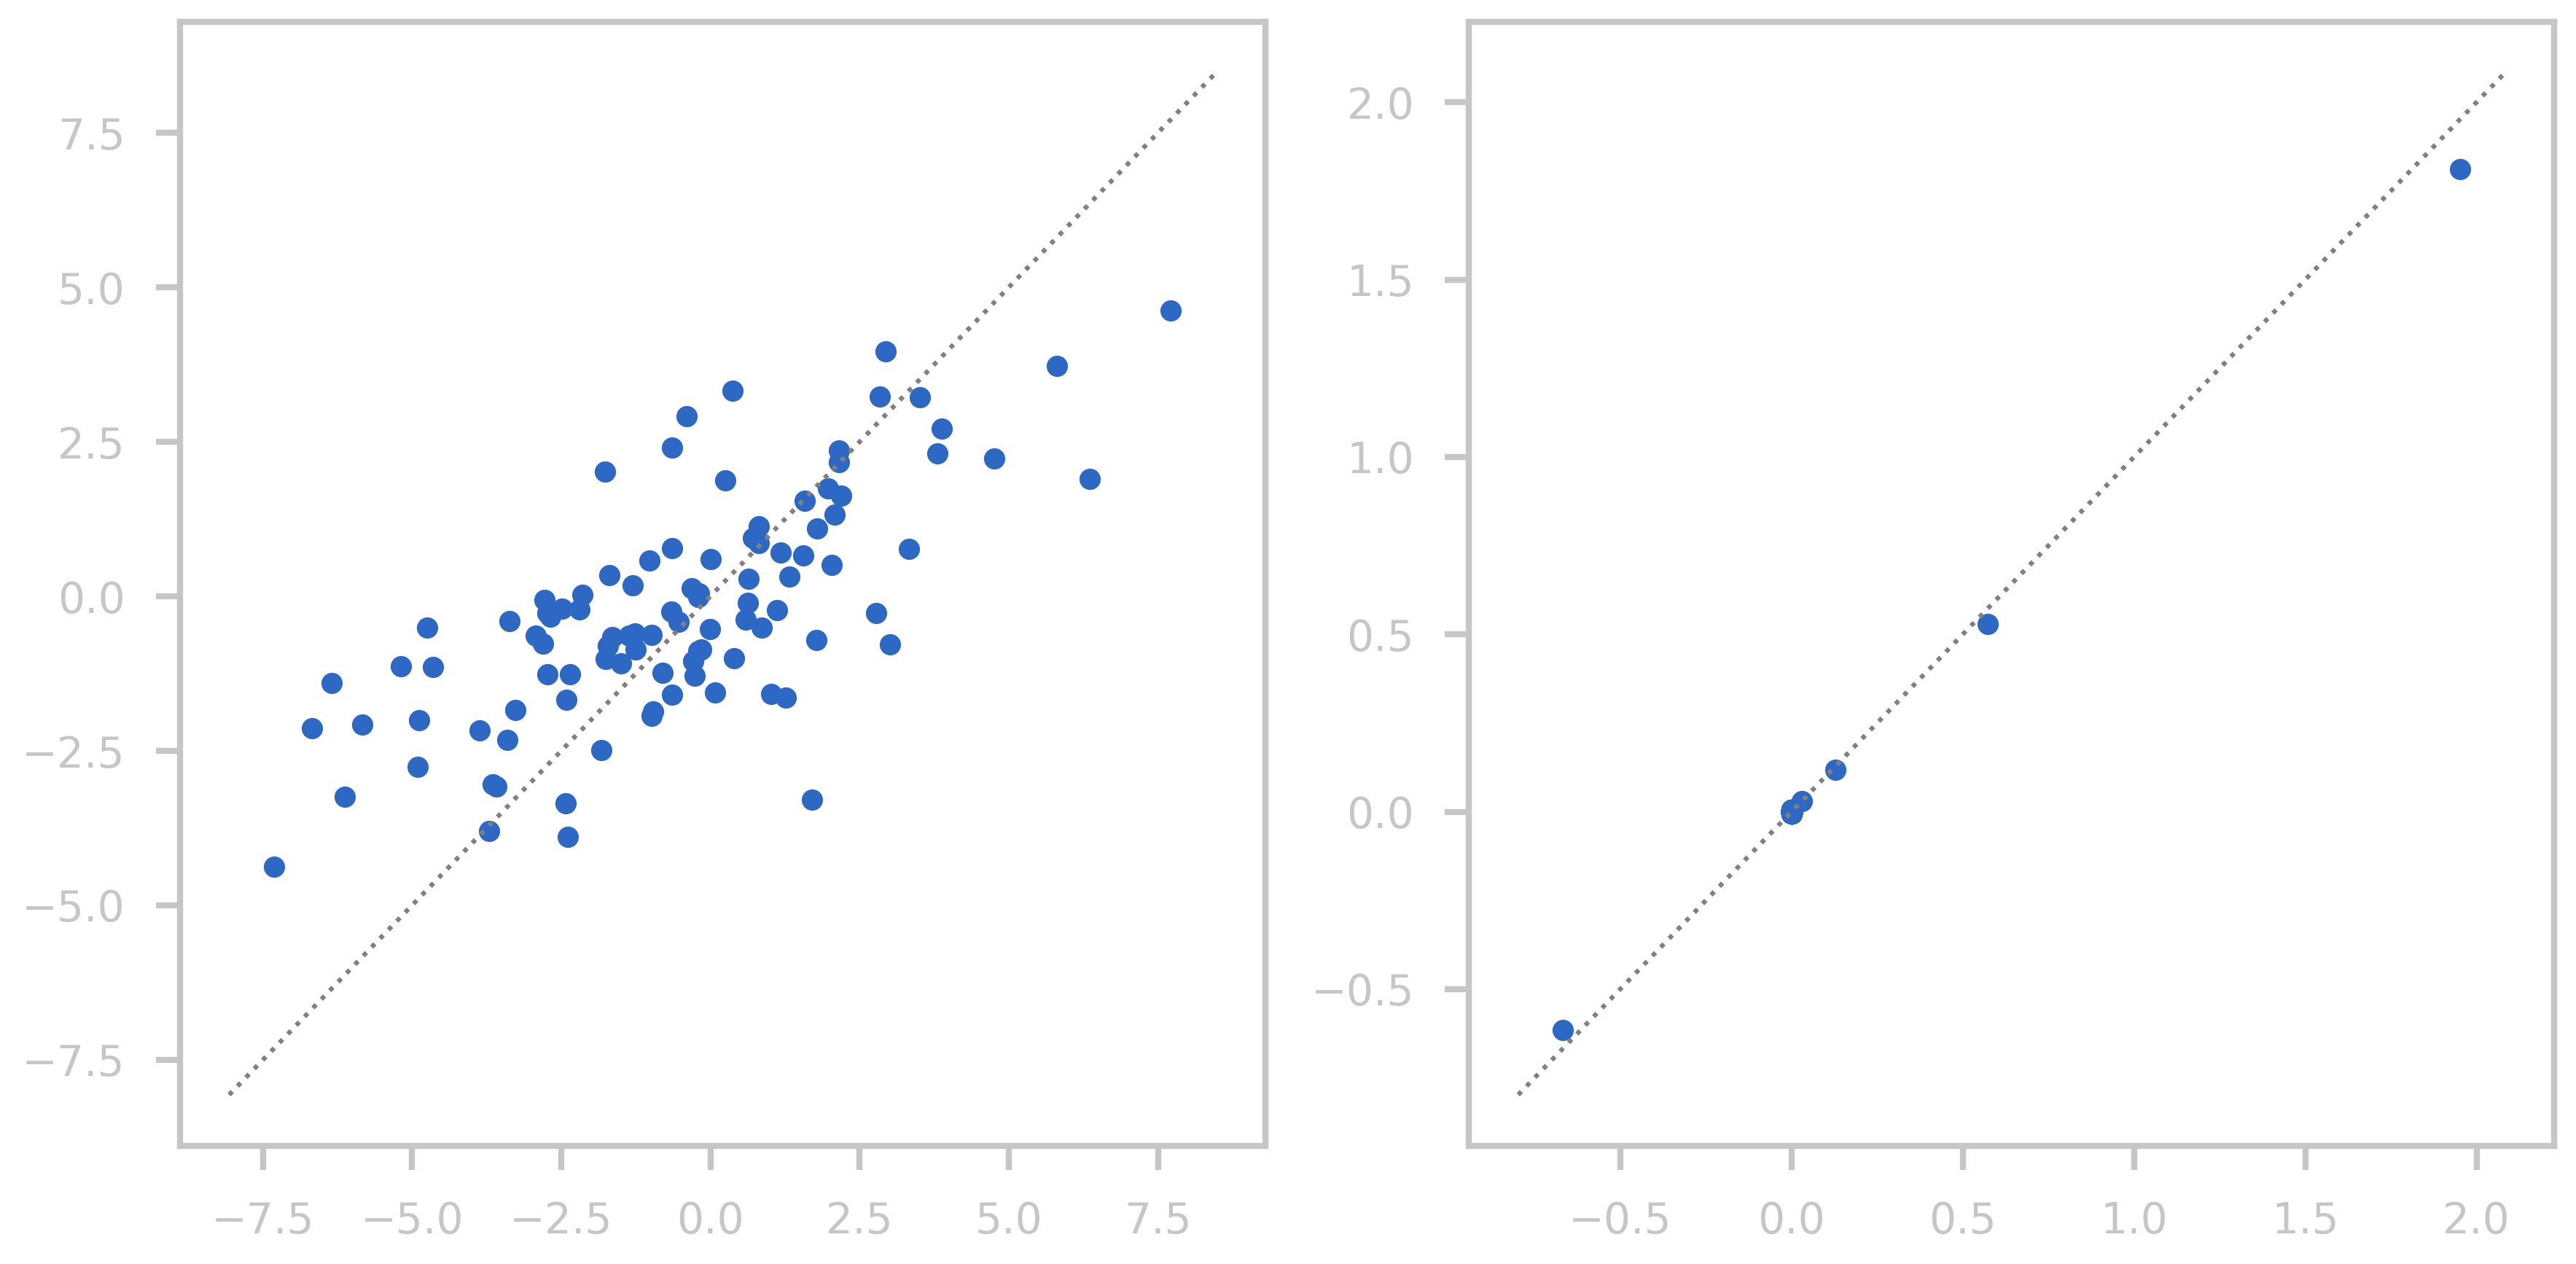

In [27]:
bhat = plr_lbfgs.coef

ypred = np.dot(Xtest, bhat)
fig = plt.figure(figsize = (12, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.scatter(ytest, ypred)
mpl_utils.plot_diag(ax1)
ax2.scatter(b, bhat)
mpl_utils.plot_diag(ax2)
plt.tight_layout()
plt.show()

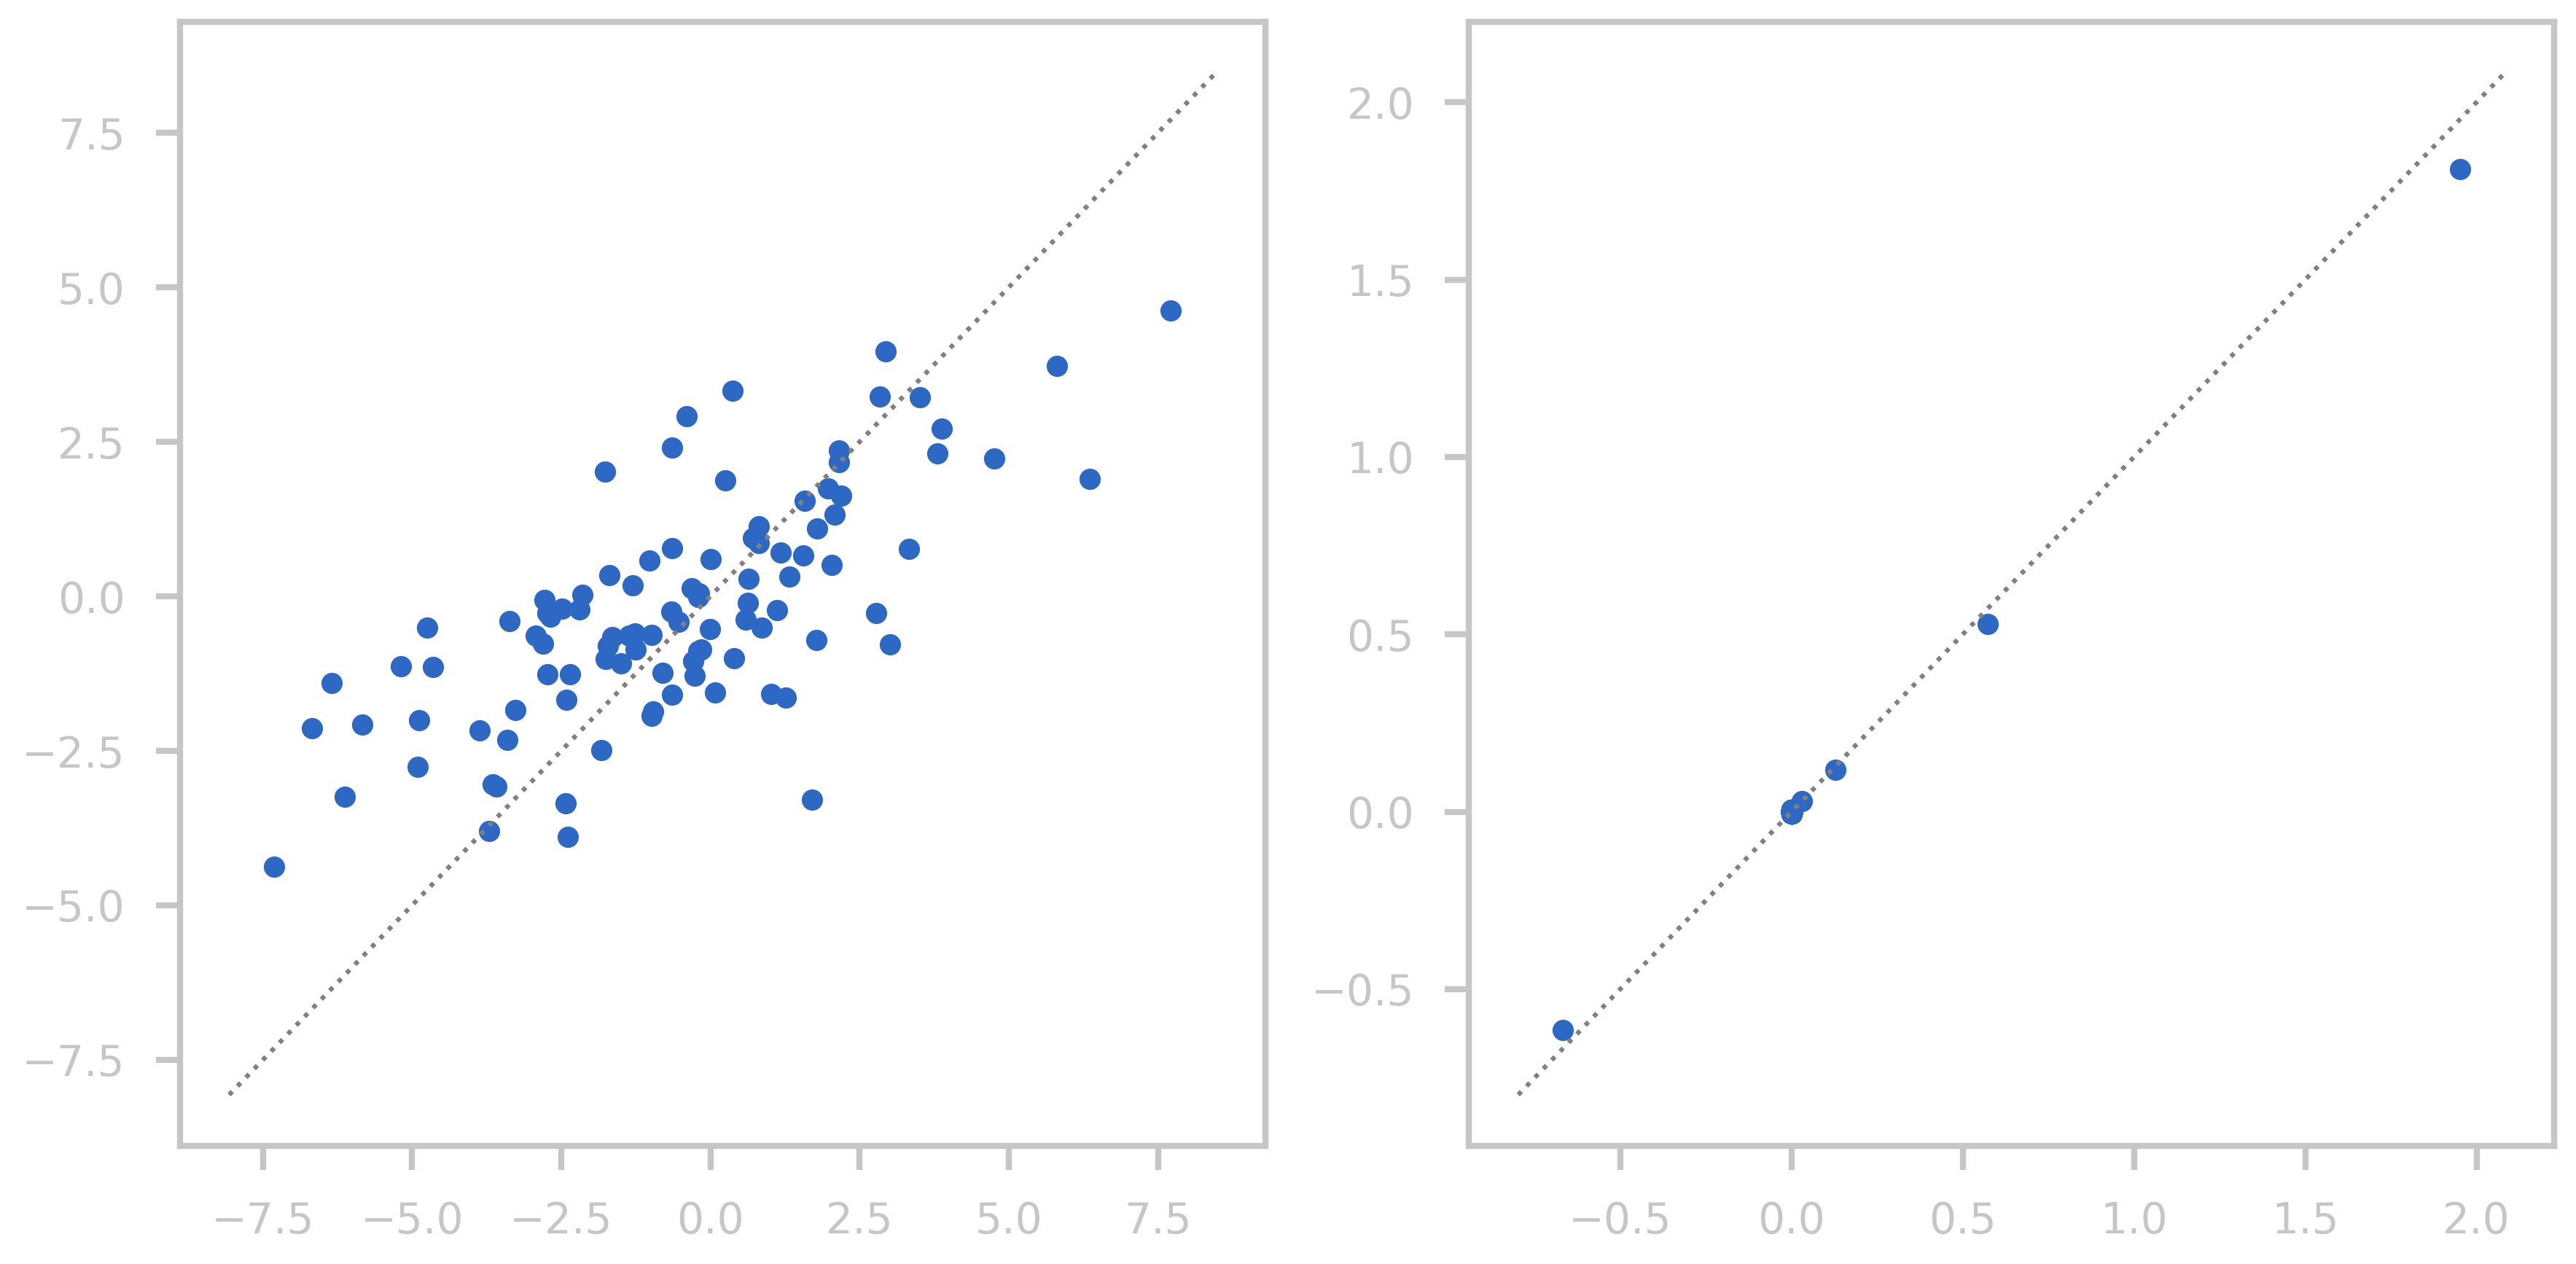

In [28]:
bhat = plr_cg.coef

ypred = np.dot(Xtest, bhat)
fig = plt.figure(figsize = (12, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.scatter(ytest, ypred)
mpl_utils.plot_diag(ax1)
ax2.scatter(b, bhat)
mpl_utils.plot_diag(ax2)
plt.tight_layout()
plt.show()

In [29]:
plr_lbfgs.wk

array([0.  , 0.25, 0.25, 0.25, 0.25])

In [30]:
plr_cg.wk

array([0.  , 0.25, 0.25, 0.25, 0.25])

In [31]:
np.std(b[b!=0])

0.8702424383198252

In [32]:
plr_cg.wk

array([0.  , 0.25, 0.25, 0.25, 0.25])